# Getting Started with Xanthos

In this section, we will introduce
* How to install and run `Xanthos`
* How to use `Xanthos` functions

## Install Xanthos

* Download and install Python (>= 3.6).
* From a command prompt or terminal, install the latest `Xanthos` version from Github using
> `python -m pip install git+https://github.com/JGCRI/xanthos.git`
* (Optional) Clone `Xanthos` to your local folder if you would like to make modifications to `Xanthos`. From a command prompt, navigate to your preferred location, and clone `Xanthos`.
> `git clone https://github.com/JGCRI/xanthos.git`

## Download Example Data

`Xanthos` provides a function `get_package_data` to retrieve and download example data. The example data provided in this tutorial uses WATCH climate forcing data from 1971 to 2001.

To download, open a python console. Make sure to change the `data_dir` to your preferred location. This could take about 10 minutes.

In [1]:
import xanthos

# the directory that you want to download and extract the example data to
data_dir = '<my data download location>'

# download and unzip the package data to your local machine
xanthos.get_package_data(data_dir)

ModuleNotFoundError: No module named 'xanthos'

## Set Up Configuration File

The configuration file (e.g., `pm_abcd_mrtm.ini`) is located in the `example` folder downloaded from the previous step. Make sure to change the following variables in the configuration file to represent the local path to your example data: `RootDir`, `TempMinFile`, `PrecipitationFile`.

If you are using [Xanthos AWS Server](https://xanthos.msdlive.org/), the function `get_data_dir` will find your relative path to the example data folder.

In [1]:
import os
            
# get relative path to the data folder
def get_data_dir():
    return os.path.join(os.path.dirname(os.getcwd()), "data")

# root directory
data_dir = get_data_dir()

Let's take a look at the example configuration file `pm_abcd_mrtm.ini`.

In [2]:
# path to the example folder
example_dir = os.path.join(data_dir, 'example')

# path to the configuration (.ini) file
config_file = os.path.join(example_dir, 'pm_abcd_mrtm.ini')

# take a look at configuration file
f = open(config_file, 'r')
print(f.read())
    
f.close()

[Project]

# project name
ProjectName                 = pm_abcd_mrtm_watch_1971_2001

# full path to directory containing input and output directories
RootDir = /home/jovyan/data/example

# input directory name contained in root
InputFolder                 = input

# output directory name containined in root
OutputFolder                = output

# directory name where the reference data is contained in the input directory
RefDir                      = reference

# directory name where PET dir is
pet_dir                     = pet

# directory name where the routing data is contained in the input directory
RoutingDir                  = routing

# directory name where the runoff data is contained in the input directory
RunoffDir                   = runoff

# directory name where the diagnostics directory is contained in the input directory
DiagDir                     = diagnostics

# directory name where the accessible water input file directory is contained
AccWatDir                   = 

Modify the configuration file by changing `RootDir`, `TempMinFile`, `PrecipitationFile` to represent your local path. There are two options to change your configuration file:

* Option 1: change them manually in the `pm_abcd_mrtm.ini`. 
* Option 2: change them using `replace_line` function.

In [3]:
# function to replace lines in the text file
def replace_line(filename, line_number, text):
    """
    replace lines in a file.
    
    :filename:       string for path to the file
    :line_number:    integer for the line number to replace
    :text:           string for replacement text
    """
    
    with open(filename) as file:
        lines = file.readlines()
    lines[line_number - 1] = text

    with open(filename, 'w') as file:
        for line in lines:
            file.write(line)

In [4]:
# This will update file paths within the configuraton file
# Update RootDir
replace_line(
    filename = config_file,
    line_number = 7,
    text = f'RootDir = {example_dir}\n'
)

# Update path to TempMinFile
TempMinFile_new = os.path.join(example_dir, 'input/climate/pr_gpcc_watch_monthly_mmpermth_1971_2001.npy')
replace_line(
    filename = config_file,
    line_number = 154,
    text = f'TempMinFile = {TempMinFile_new}\n'
)

# Update path to PrecipitationFile
PrecipitationFile_new = os.path.join(example_dir, 'input/climate/pr_gpcc_watch_monthly_mmpermth_1971_2001.npy')
replace_line(
    filename = config_file,
    line_number = 157,
    text = f'PrecipitationFile = {PrecipitationFile_new}\n'
)

In [5]:
# take a look at the updated configuration file
f = open(config_file, 'r')
print(f.read())
    
f.close()

[Project]

# project name
ProjectName                 = pm_abcd_mrtm_watch_1971_2001

# full path to directory containing input and output directories
RootDir = /home/jovyan/data/example

# input directory name contained in root
InputFolder                 = input

# output directory name containined in root
OutputFolder                = output

# directory name where the reference data is contained in the input directory
RefDir                      = reference

# directory name where PET dir is
pet_dir                     = pet

# directory name where the routing data is contained in the input directory
RoutingDir                  = routing

# directory name where the runoff data is contained in the input directory
RunoffDir                   = runoff

# directory name where the diagnostics directory is contained in the input directory
DiagDir                     = diagnostics

# directory name where the accessible water input file directory is contained
AccWatDir                   = 

## Run Xanthos

To run xanthos, pass the path of the configuration file to `xanthos.run_model`.

In [6]:
import xanthos

# run Xanthos 
xanthos.run_model(config_file)

INFO: ProjectName : pm_abcd_mrtm_watch_1971_2001
INFO: InputFolder : /home/jovyan/data/example/input
INFO: OutputFolder: /home/jovyan/data/example/output/pm_abcd_mrtm_watch_1971_2001
INFO: StartYear - End Year: 1971-2001
INFO: Number of Months    : 372
INFO: Running: Historic Mode
INFO: Diagnostics will be performed using the data file: /home/jovyan/data/example/input/diagnostics/vic_watch_hist_nosoc_co2_qtot_global_annual_1971_2000.nc


/usr/src/xanthos/xanthos/xanthos/data_reader/data_load.py:360: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  data = np.load(fn)


INFO: ---Simulation in progress...
INFO: 	Processing PET...
INFO: 		Processing Years:  1971 to 1972
INFO: 		Processing Years:  1972 to 1973
INFO: 		Processing Years:  1973 to 1974
INFO: 		Processing Years:  1974 to 1975
INFO: 		Processing Years:  1975 to 1976
INFO: 		Processing Years:  1976 to 1977
INFO: 		Processing Years:  1977 to 1978
INFO: 		Processing Years:  1978 to 1979
INFO: 		Processing Years:  1979 to 1980
INFO: 		Processing Years:  1980 to 1981
INFO: 		Processing Years:  1981 to 1982
INFO: 		Processing Years:  1982 to 1983
INFO: 		Processing Years:  1983 to 1984
INFO: 		Processing Years:  1984 to 1985
INFO: 		Processing Years:  1985 to 1986
INFO: 		Processing Years:  1986 to 1987
INFO: 		Processing Years:  1987 to 1988
INFO: 		Processing Years:  1988 to 1989
INFO: 		Processing Years:  1989 to 1990
INFO: 		Processing Years:  1990 to 1991
INFO: 		Processing Years:  1991 to 1992
INFO: 		Processing Years:  1992 to 1993
INFO: 		Processing Years:  1993 to 1994
INFO: 		Processing Y

/usr/src/xanthos/xanthos/xanthos/hydropower/potential.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  e_grids = q_ex_h * hyd_grid_data["elevD"][:, np.newaxis]


INFO: ---Hydropower Potential has finished successfully: 4.321430683135986 seconds ------
INFO: ---Start Hydropower Actual:


/usr/src/xanthos/xanthos/xanthos/hydropower/actual.py:46: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  self.rule_curves = np.load(settings.rule_curves)  # rule curves for all 1593 dams


INFO: ---Hydropower Actual has finished successfully: 32.29433345794678 seconds ------
INFO: ---Start Diagnostics:
INFO: ---Diagnostics has finished successfully: 0.15430712699890137 seconds ------
INFO: ---Output simulation results:
DEBUG: Outputting data annually
DEBUG: Unit is km3peryear


/usr/src/xanthos/xanthos/xanthos/diagnostics/diagnostics.py:130: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  agg_df.loc[-1, 1:] = agg_df.sum(numeric_only=True)
/usr/src/xanthos/xanthos/xanthos/diagnostics/diagnostics.py:130: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  agg_df.loc[-1, 1:] = agg_df.sum(numeric_only=True)
/usr/src/xanthos/xanthos/xanthos/diagnostics/diagnostics.py:130: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  agg_df.loc[-1, 1:] = agg_df.sum(numeric_only=True)


DEBUG: pet output dimension is (67420, 31)
DEBUG: aet output dimension is (67420, 31)
DEBUG: q output dimension is (67420, 31)
DEBUG: soilmoisture output dimension is (67420, 31)
DEBUG: avgchflow output dimension is (67420, 31)
INFO: Aggregating by Basin
INFO: Aggregating by Country
INFO: Aggregating by GCAM Region
INFO: Aggregated unit is km3peryear
INFO: ---Output finished: 10.41636037826538 seconds ---
INFO: End of pm_abcd_mrtm_watch_1971_2001


## Use Xanthos Module

User can use any `Xantho` module individually by providing required input. The following example shows how to calculate accessible water using the `AccessibleWater` module. `AccessibleWater` module requires three inputs: 
1. Configuration object: use xanthos module `ConfigReader` to load
2. Loaded data object: use xanthos module `DataLoader` to load
3. Monthly runoff in each grid cell
    * Format requirement: 2D array ordered by Xanthos id for [grid_cell, month].
    * Grid cell resolution: Xanthos grid cell is at 0.5 degree xanthos grid resolution and the id is from 1 to 67420. Please find latitude and longitude for Xanthos grid cells in `example/input/referece/coordinate.csv`.
    * Unit requirement: the runoff values should be in *mm/month*.
    * Note: please make sure the monthly runoff has the same time period specified in the configuration file

In [7]:
import numpy as np

# since we do not have monthly runoff, we make a ramdom example of runoff time seris
# the runoff data will be 67420 grid cells by 372 months (match 1971 - 2001 in the configuration)
runoff = np.random.random((67420, 372))
print(runoff)

# Create a demo folder 
demo_dir = os.path.join(data_dir, 'example', 'output', 'demo')
if not os.path.exists(demo_dir):
    os.makedirs(demo_dir, exist_ok=True)

[[0.66397553 0.67983164 0.98253431 ... 0.15047238 0.82172177 0.63389818]
 [0.33630601 0.85101678 0.66781046 ... 0.96112267 0.00513146 0.34319943]
 [0.36637432 0.97814917 0.93460665 ... 0.74736033 0.34288096 0.43124515]
 ...
 [0.32055569 0.76497925 0.88275882 ... 0.49226798 0.26013096 0.58941549]
 [0.00465257 0.87417416 0.87083701 ... 0.78056207 0.72634921 0.0484245 ]
 [0.78887771 0.69552447 0.69863247 ... 0.89175757 0.62223068 0.05194497]]


In [8]:
from xanthos import ConfigReader
from xanthos.data_reader.data_load import DataLoader
from xanthos.accessible.accessible import AccessibleWater

# load configuration setting using ConfigReader
config = ConfigReader(ini=config_file)

# Update the output folder path to demo folder to avoid overwriting the exisitng file
config.OutputFolder = demo_dir
config.update({})

# load reference data
data = DataLoader(config_obj=config)

# calculate accessible water (~ 15 seconds)
AccessibleWater(settings=config, ref=data, runoff=runoff)

/usr/src/xanthos/xanthos/xanthos/data_reader/data_load.py:360: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  data = np.load(fn)


***

# Input and Output Data

In this section, we will
* Learn the data format for Xanthos inputs and outputs
* Visualize Xanthos inputs and outputs

## Plotting Functions

In [20]:
import xanthos

import os
from scipy import stats
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

def name_columns(arr, start_yr=1971):
    """
    find cooresponding year month names for the array.

    :param arr:             array with format [grid by year-month]
    :param start_yr:        integer of data start year

    :return:                string vector and dictionary
    """

    cols_str = []
    cols_dict = {}
    for i in range(0, arr.shape[1], 1):
        mod = i%12
        str_yr = str(start_yr)

        if mod == 0:
            cols_str.append(str_yr)

            if str_yr in cols_dict:
                cols_dict[str_yr].append(i)
            else:
                cols_dict[str_yr] = [i]

        elif mod == 11:
            cols_str.append(str_yr)

            if str_yr in cols_dict:
                cols_dict[str_yr].append(i)
            else:
                cols_dict[str_yr] = [i]

            start_yr += 1
        else:
            cols_str.append(str_yr)

            if str_yr in cols_dict:
                cols_dict[str_yr].append(i)
            else:
                cols_dict[str_yr] = [i]

    return cols_str, cols_dict

def arr_to_df(arr, stat='mean', start_yr=1971, from_yr=False, through_yr=False):
    """
    Calculate certain stats on xanthos input array (usually climate data) and convert to certain data frame format.

    :param arr:                 array for xanthos input or similar format [grid by year-month]
    :param stat:                string for stats to apply ['min', 'max', 'mean', 'median']
    :param start_yr:            integer for data start year
    :param from_yr:             integer for start year to filter
    :param through_yr:          integer for through year to filter

    :return:                    data frame
    """

    cols_str, cols_dict = name_columns(arr, start_yr=start_yr)

    df = pd.DataFrame(data=arr, columns=cols_str)

    # select target years to process
    if from_yr:
        idx_start = min(cols_dict[str(from_yr)])
    else:
        idx_start = 0

    if through_yr:
        idx_end = max(cols_dict[str(through_yr)])
    else:
        idx_end = df.shape[1]

    df = df.iloc[:, idx_start:idx_end]

    df['key'] = 'value'

    if stat == 'mean':
        dfx = df.groupby('key').mean().T
    elif stat == 'max':
        dfx = df.groupby('key').max().T
    elif stat == 'min':
        dfx = df.groupby('key').min().T
    elif stat == 'median':
        dfx = df.groupby('key').median().T
    else:
        raise ValueError("Please enter stat of 'mean', 'median', 'min', 'max'.")

    return dfx

def format_data(sim, obs, id=229, from_yr=1971, through_yr=2010):
    """
    Combine sim and obs and format to [basin_id, basin_name, year, time, obs, sim].

    :param sim:                 data frame of xanthos output at basin scale
    :param obs:                 data frame of observation [basin, year, month, q]
    :param id:                  integer for selected basin id, or 'global' to aggregate all basins together
    :param from_yr:             integer for start year to filter data
    :param through_yr:          integer for end year to filter data

    :return:                    data frame
    """

    # melt all month_year columns to time and value for simulated output
    sim_melt = sim.melt(id_vars=['id', 'name'])

    # format simulated output
    sim_melt = sim_melt.rename(columns={'id': 'basin', 'variable': 'year'})
    sim_melt['year'] = sim_melt.year.astype(int)

    # aggregate observation to annual
    obs_annual = obs.groupby(['basin', 'year'], as_index=False).sum().drop(['month'], axis=1)

    # merge observation and simulation
    df = pd.merge(sim_melt, obs_annual, how='left', on=('basin', 'year'))
    df = df.rename(columns={'value': 'sim', 'q': 'obs', 'basin':'basin_id', 'name': 'basin_name'})

    # select basin and year range to plot
    if id == 'global':
        df_format = df[(df.year>=from_yr) & (df.year<=through_yr)].reset_index(drop=True)
        df_format = df_format.groupby(['year'], as_index=False).sum()
        df_format['basin_id'] = 'All Basins'
        df_format['basin_name'] = id
    else:
        df_format = df[df.basin_id.isin(id) & (df.year>=from_yr) & (df.year<=through_yr)].reset_index(drop=True)

    # add time
    df_format['time'] = pd.to_datetime(df_format.year, format='%Y')

    return df_format

def plot_single_line(dfx, title='', x_label='', y_label=''):
    """
    Plot a single time series.

    :param dfx:             data frame with a column of values
    :param title:           string for figure title
    :param x_label:         string for x axis label
    :param y_label:         string for y axis label
    """

    # plt.figure()
    with plt.style.context("seaborn-v0_8-white"):
        fig, ax = plt.subplots(figsize=(16, 8), constrained_layout=False)
        dfx.plot(kind='line', legend=False, title=title, colormap="cubehelix", ax=ax)
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_facecolor('white')
        plt.show()

def plot_comparison(df_plot, y_label=''):
    """
    Plot comparison between observations and simulations.

    :param df_plot:         data frame with time, obs and sim
    :param y_label:         string for y axis label
    """

    # title
    title = str(df_plot['basin_id'].unique()[0]) + ' - ' + df_plot['basin_name'].unique()[0]

    # Plot
    with plt.style.context("seaborn-v0_8-white"):
        fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=False)
        df_plot.plot(x = 'time', y=['obs', 'sim'], kind='line', color=['black', 'dodgerblue'],
                     lw=3, legend=True, ax=ax)
        ax.set_title(title, fontsize=18, fontweight='bold')
        ax.set_xlabel('Time', fontsize=18)
        ax.set_ylabel(y_label, fontsize=18)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        ax.legend(fontsize=16)
        ax.grid()
        plt.show()
    
def plot_diagnostics(data, titlestr):
    """
    Plot diagnostics.
    
    :param data:            array from diagnostic output
    :param titlestr:        string for output scale ('Basin', 'Country', 'Region')
    """
    
    fig = plt.figure(figsize=(10,6), constrained_layout=False)
    ax = plt.gca()
    ax.loglog([0.01, 100000], [0.01, 100000], 'grey')
    ax.scatter(data[:, 0], data[:, 1], c='aquamarine', alpha=0.7, edgecolors='black', label='VIC_1971-2000')
    ax.scatter(data[:, 0], data[:, 2], c='salmon', alpha=0.7, edgecolors='black', label='WBM')
    ax.scatter(data[:, 0], data[:, 3], c='Blue', alpha=0.7, edgecolors='black', label='WBMc')
    ax.scatter(data[:, 0], data[:, 4], c='white', alpha=0.7, edgecolors='black', label='UNH/GRDC_1986-1995')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.axis([0.01, 1e5, 0.01, 1e5])
    ax.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize=12)
    plt.title('Hydro Model Diagnostics at ' + titlestr + ' Scale', fontsize=14, fontweight='bold')
    plt.xlabel(r'Simulated Averaged Annual Runoff ($km^3$/yr)', fontsize=14)
    plt.ylabel(r'Averaged Annual Runoff ($km^3$/yr)', fontsize=14)

def plot_map(arr, coord, legend_label=None, cmap=None):
    """
    Plot spatial map.
    
    :param arr:             array of grid cells by year-month
    :param coord:           data frame for coordinates [lat, lon]
    :param legend_label:    string for legend label
    :param cmap:            string for color palette
    
    """

    cols_str, cols_dict = name_columns(tas, start_yr=1971)

    df = pd.DataFrame(data=arr, columns=cols_str).mean(axis=1).rename('value')

    df = pd.concat([df, coord], axis=1)

    fig = plt.figure(figsize=(15,6), constrained_layout=True)
    spec = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(spec[0, 0])
    p = ax.scatter(df.lon, df.lat, s=3, c=df.value, cmap=cmap)
    legend_kwds = {'label':legend_label,
                   'shrink':1}

    cbar = plt.colorbar(p, **legend_kwds)
    cbar.ax.set_ylabel(legend_label, rotation=270)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")


## Read Input and Output Data

In [21]:
# read runoff observation from input folder
obs_dir = os.path.join(data_dir, 'example', 'input', 'calibration')
obs_file = 'vic_watch_basin_km3_1971_2001_monthly.csv'
runoff_obs = pd.read_csv(os.path.join(obs_dir, obs_file))

# xanthos coordinates
coord = pd.DataFrame(data.coords[:, 1:3], columns=['lon', 'lat'])

# we can get temperature input from loaded data
# Load all input data using xanthos module `DataLoader`
tas = data.tair_load

# read example outputs
output_dir = os.path.join(data_dir, 'example', 'output', 'pm_abcd_mrtm_watch_1971_2001')

# runoff aggregated to basin scale
runoff_basin_file = 'Basin_runoff_km3peryear_pm_abcd_mrtm_watch_1971_2001.csv'

# runoff at 0.5 degree
runoff_grid_file = 'q_km3peryear_pm_abcd_mrtm_watch_1971_2001.csv'

# read runoff as data frame
runoff_basin = pd.read_csv(os.path.join(output_dir, runoff_basin_file))
runoff_grid = pd.read_csv(os.path.join(output_dir, runoff_grid_file))

## Xanthos Input Examples

Global climate data usually are stored in netCDF files. `xanthos` requires climate inputs as numpy files (e.g., `.np`). If users want to provide different climate inputs from the example data, please convert the climate data to required format as [grid by year-month]. Standard Xanthos resolution is 0.5 degree, and there are 67420 inland grid cells in total by year-month.

In [22]:
# input climate data format requirement 2D array [67420 grid cells, year-month, ...]
print(tas.shape)
tas[1:5,]

(67420, 372)


array([[-18.89531555, -21.55454102, -20.30705872, ...,  -5.4663147 ,
        -12.67459717, -17.27277222],
       [-19.6915802 , -22.49143066, -21.08751526, ...,  -5.88968506,
        -13.20639648, -17.82964172],
       [-21.00528564, -24.10410156, -23.00447693, ...,  -7.36795654,
        -14.70386353, -19.22087708],
       [-21.81871643, -25.10942688, -23.81903687, ...,  -7.96378174,
        -15.2135376 , -19.83913269]])

In [23]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

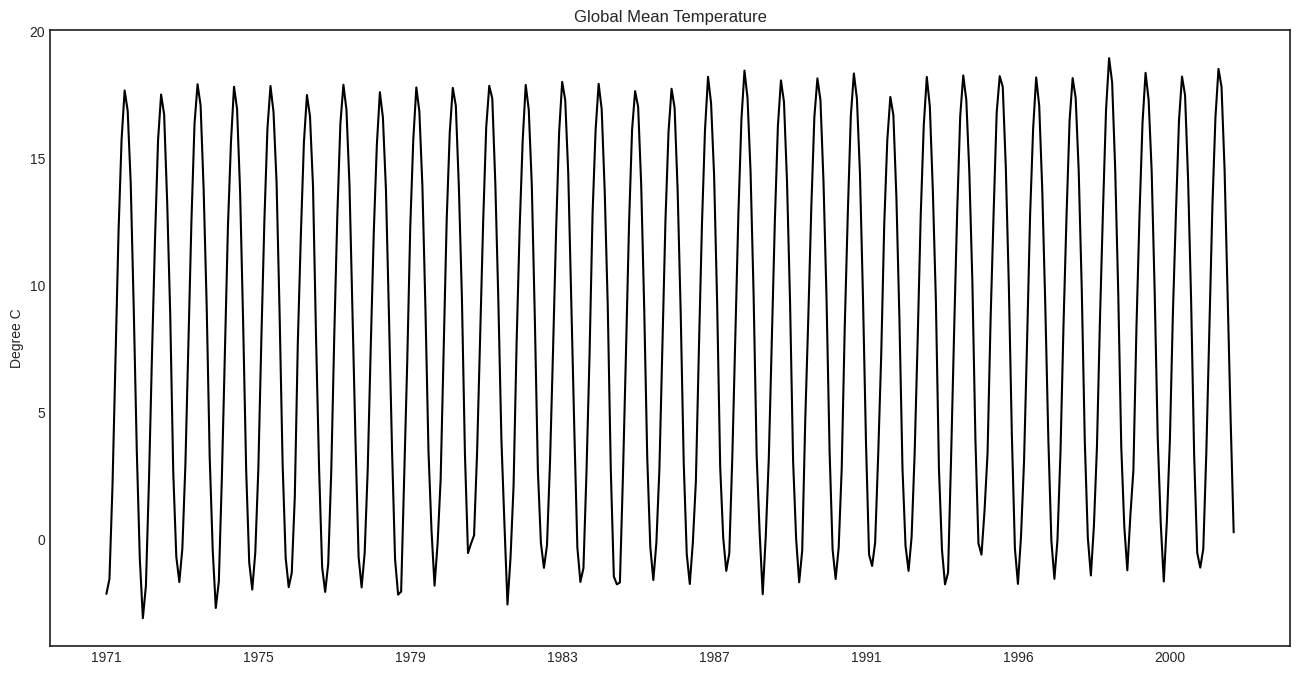

In [24]:
# input climate data time series
dfx = arr_to_df(arr=tas, stat='mean')
plot_single_line(dfx=dfx,
                 title='Global Mean Temperature',
                 y_label='Degree C')

In [25]:
# spatial mean temperature across 1971 - 2001
plot_map(arr=tas,
         coord=coord,
         legend_label='Temperature (degree C)',
         cmap='RdBu')

In [26]:
# global observed runoff format requirement [basin, year, month, q]
runoff_obs

,basin,year,month,q
0,1,1971,1,22.596311
1,1,1971,2,18.616737
2,1,1971,3,19.356970
3,1,1971,4,19.114001
4,1,1971,5,30.573557
...,...,...,...,...
87415,235,2001,8,9.183146
87416,235,2001,9,1.581408
87417,235,2001,10,1.348670
87418,235,2001,11,0.246194


## Xanthos Output Structure

Xanthos outputs are at 0.5 degree resolution in CSV files. Some outputs (e.g., runoff) are also aggregated to GCAM region, basin, and country scale.

In [27]:
# runoff at xanthos grid cells (67420 cells)
print('The output is in the unit of', config.OutputUnitStr)
runoff_grid

The output is in the unit of km3peryear


,id,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
0,1,3.499196,3.760416,3.766999,3.724275,3.745087,3.712290,3.690238,3.742392,3.716898,...,3.843989,3.821417,3.761283,3.817701,3.832962,3.805191,3.765942,3.946684,3.925090,3.846125
1,2,0.157544,0.200485,0.193464,0.137926,0.126463,0.127689,0.204124,0.189099,0.211875,...,0.292241,0.284102,0.264102,0.241170,0.436688,0.361689,0.449874,0.284137,0.351251,0.305943
2,3,0.184983,0.263882,0.258217,0.182754,0.203782,0.204118,0.326984,0.254326,0.284734,...,0.469218,0.403013,0.397171,0.346177,0.615426,0.515592,0.569435,0.396938,0.458813,0.400961
3,4,0.184133,0.271089,0.266833,0.192981,0.213800,0.222940,0.353349,0.247773,0.286880,...,0.532720,0.430720,0.424207,0.357292,0.682819,0.556121,0.552876,0.409109,0.458233,0.393148
4,5,0.200232,0.237005,0.283622,0.205184,0.211821,0.224929,0.347473,0.297400,0.290753,...,0.421585,0.374972,0.399300,0.348260,0.645637,0.534486,0.490197,0.395247,0.447426,0.388745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67415,67416,0.276856,0.230575,0.319425,0.230290,0.216269,0.233404,0.345167,0.368692,0.344930,...,0.312442,0.325180,0.325299,0.308772,0.445227,0.457679,0.381021,0.341855,0.388078,0.360437
67416,67417,0.333894,0.231086,0.314473,0.217021,0.203969,0.206759,0.319439,0.360415,0.371743,...,0.239296,0.263845,0.248965,0.245447,0.308560,0.375105,0.318961,0.268726,0.317965,0.303970
67417,67418,0.362545,0.223098,0.306808,0.200619,0.195623,0.180217,0.301064,0.349075,0.381330,...,0.197147,0.225100,0.199643,0.203029,0.223627,0.319138,0.276843,0.215057,0.273210,0.269356
67418,67419,0.087033,0.077437,0.072118,0.067343,0.061348,0.056464,0.052715,0.056154,0.045560,...,0.016711,0.015452,0.014502,0.015947,0.013887,0.013692,0.021735,0.011097,0.010065,0.009489


In [28]:
# runoff at basin scale (235 basins)
print('The output is in the unit of', config.OutputUnitStr)
runoff_basin

The output is in the unit of km3peryear


,id,name,1971,1972,1973,1974,1975,1976,1977,1978,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001
0,1,Arctic Ocean Islands,1145.443069,1492.093804,1341.364639,1283.306010,1309.683258,1554.225743,1292.289969,1327.371862,...,1356.734930,1283.146873,1105.302948,1025.685607,1411.992644,1349.929359,1209.309484,1215.290811,1328.376808,1260.970057
1,2,Northwest Territories,469.631837,447.138534,493.543565,482.018603,491.983189,498.414040,530.325685,504.877059,...,587.163087,582.698290,606.134769,671.532510,663.248651,651.753698,646.523186,650.577042,659.182835,678.125821
2,3,Siberia North Coast,223.945993,187.136077,229.684111,224.855858,201.784275,194.420405,187.759836,166.803275,...,211.759195,212.053449,186.432140,220.133729,195.835677,187.776636,178.747630,227.802098,187.472609,182.356354
3,4,Siberia West Coast,573.950826,687.219762,671.607608,583.058739,608.450929,589.507306,679.343756,688.283673,...,606.992752,564.961654,660.606833,634.878320,773.765837,692.618981,661.542572,677.126880,680.739008,673.986572
4,5,Kara Sea Coast,207.648901,186.920652,188.909038,164.723636,209.486800,165.103240,178.278467,210.304230,...,222.135195,211.970378,177.499458,224.490936,196.564751,198.169245,215.550297,212.244437,184.431571,222.321162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Rio Grande River Basin,44.405257,44.556657,53.256264,51.244645,43.600788,50.194872,35.516325,56.910455,...,55.004094,40.182020,31.831690,33.789996,35.450004,46.154355,37.325743,34.568666,31.458995,31.634092
231,232,New England Basin,197.621204,230.945894,228.404529,212.221180,219.280223,226.989342,233.455606,207.845080,...,206.401141,217.257088,215.243915,208.941643,237.527955,207.858317,220.956140,218.375845,219.229009,188.477995
232,233,Mid Atlantic Basin,94.360120,121.093517,100.414981,92.973803,115.326554,97.045582,103.381721,105.590279,...,106.948161,118.389437,120.473958,104.168004,146.788234,109.409213,126.943563,109.572289,121.343027,104.509961
233,234,Hawaii,90.403138,77.594370,66.516706,93.649276,86.486023,78.496287,69.912493,84.934176,...,71.548693,60.613099,96.407296,60.833836,66.526985,84.758768,35.183624,65.133219,60.502970,53.162302


## Output Visualization

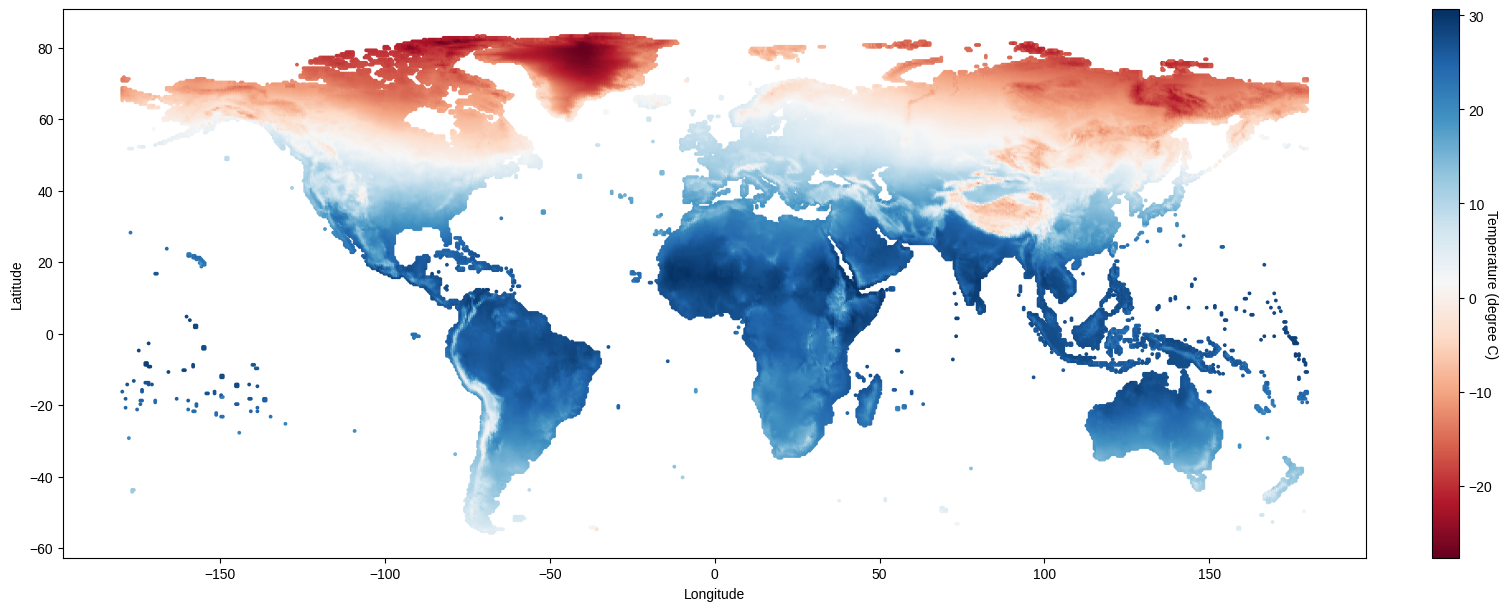

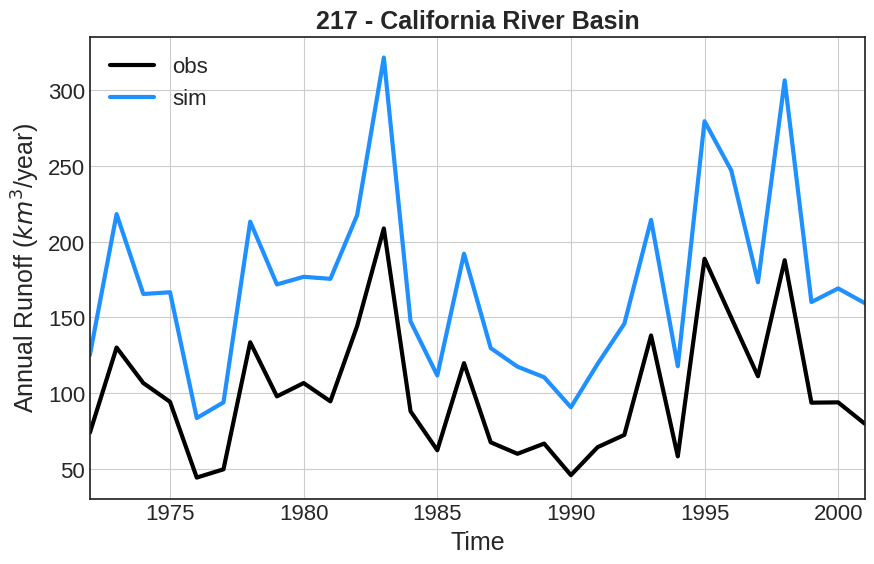

In [29]:
# Compare time series of simulation and observation for an individual basin
df_plot = format_data(sim=runoff_basin,
                      obs=runoff_obs,
                      id=[217],
                      from_yr=1972,
                      through_yr=2001)
plot_comparison(df_plot=df_plot,
                y_label='Annual Runoff ($km^3$/year)')

/tmp/ipykernel_112/73393619.py:131: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_format = df_format.groupby(['year'], as_index=False).sum()


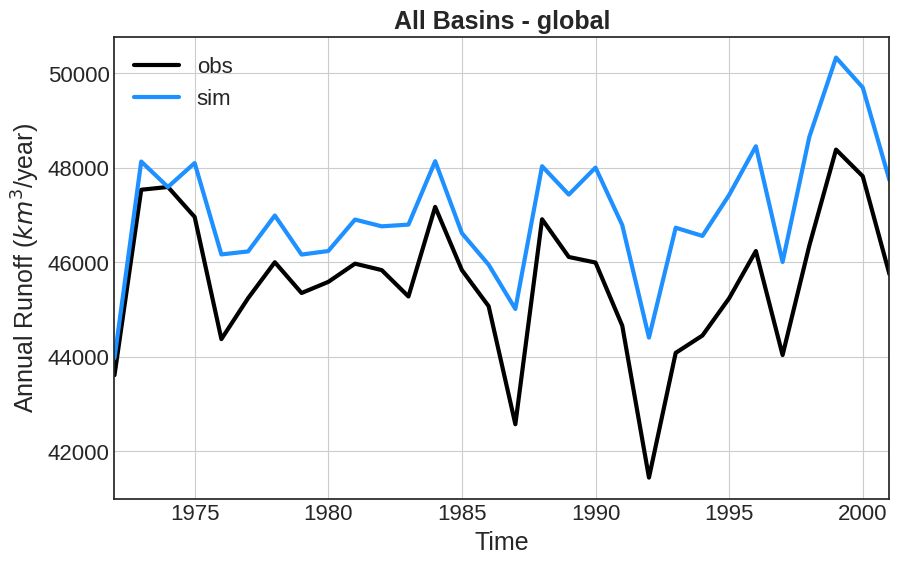

In [30]:
# Compare time series of simulation and observation for all basins together
df_plot = format_data(sim=runoff_basin,
                      obs=runoff_obs,
                      id='global',
                      from_yr=1972,
                      through_yr=2001)
plot_comparison(df_plot=df_plot,
                y_label='Annual Runoff ($km^3$/year)')

In [31]:
# Diagnostics with other global data
runoff_diag = pd.read_csv(os.path.join(data_dir, 
                                       'example', 'output', 'pm_abcd_mrtm_watch_1971_2001', 
                                       'Diagnostics_Runoff_Basin_Scale_km3peryr.csv')).to_numpy()

# plot diagnostics
plot_diagnostics(data=runoff_diag[1:, 1:],
                 titlestr='Basin')

In [32]:
# spatial mean runoff across 1971 - 2001
plot_map(arr=runoff_grid,
         coord=coord,
         legend_label='Runoff (km3/year)',
         cmap='viridis')